In [1]:
setwd('/import/DB/momo-6.12.0.199/runtime/PIPELINE/taxonkit3//GC/')

In [2]:
RF = readRDS('./model.RF_borta2.rds')

Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"


In [3]:
load('./co.train-test.rda')
prediction_prob <- predict(RF, newdata=X_test, type="prob")

In [4]:
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




In [5]:
XGBoost = readRDS('model.XGBoost2.rds')

In [6]:
# plot.roc(factor(y_test),  prediction_prob[,2],percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")

# plot.roc(factor(y_test),  preds1,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")

# plot.roc(factor(y_test),  GBM,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")

# plot.roc(factor(y_test),  as.numeric(XGBoost),percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")

In [7]:
SVM = readRDS('model.SVM.co2.rds')

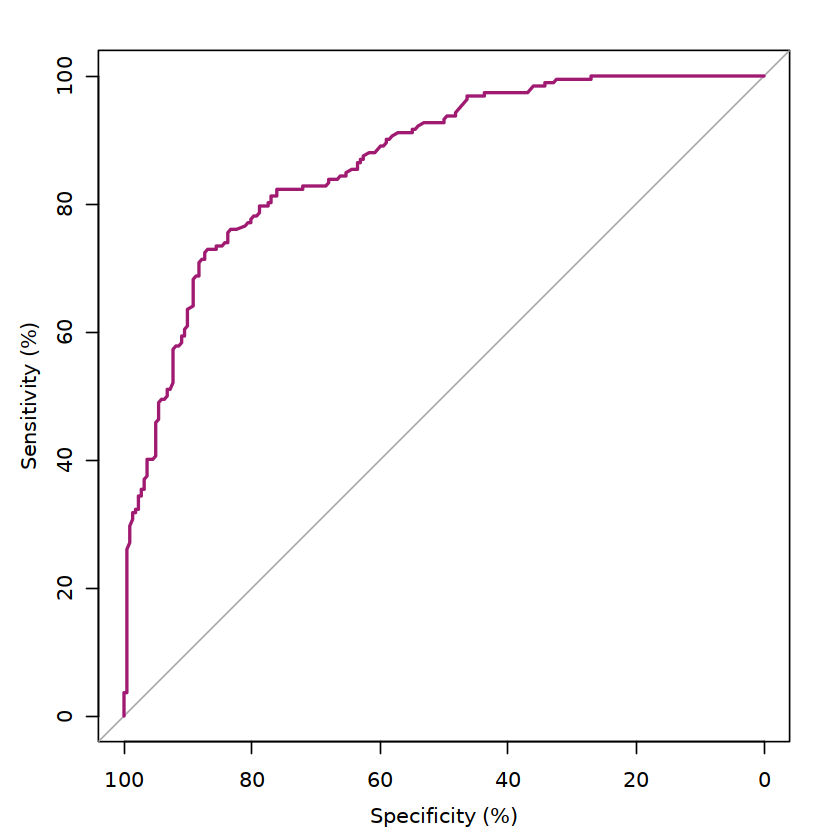

In [8]:
plot.roc(factor(y_test),  prediction_prob[,2],percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")

In [10]:
pdf('./allin.EGC.GCA.pdf',width = 6,height = 6)
rocobj1 <- plot.roc(factor(y_test),  prediction_prob[,2],percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
#rocobj2 <- lines.roc(factor(y_test),  preds1,percent=TRUE, levels=c(0,1),direction="<", col="#008600")
#rocobj3 <- lines.roc(factor(y_test),  GBM,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")
rocobj5 <- lines.roc(factor(y_test),  as.numeric(XGBoost),percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")
rocobj6 <- lines.roc(factor(y_test),  SVM[,1],percent=TRUE, levels=c(0,1),direction="<", col="#CD5944")
legend("bottomright", legend=c(paste0("RF ", round(rocobj1$auc/100,digits = 3)),
                              # paste0("rpart ", round(rocobj2$auc/100,digits = 3)),
                               #paste0("GBM ", round(rocobj3$auc/100,digits = 3)),
                               paste0("XGBoost ", round(rocobj5$auc/100,digits = 3)),
                                   paste0("SVM ", round(rocobj6$auc/100,digits = 3))),
       col=c("#1c61b6", "#9F1A70","#CD5944"), lwd=1)
dev.off()

png 
  2